In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# Importing the dataset
df_data = pd.read_csv('white_energy_house.csv')
# df_data = pd.read_csv('D:\Data\Benjamin\Web Site\MACSiMUM\MACSiMUM.org_APP\virtualfolder\userfiles\1556782927.2912.pxhmfg.csv')

X = df_data.iloc[:, 2:].values
y = df_data.iloc[:, 1].values

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [252]:
X_train

array([[ 22.60001716,  83.67416925],
       [ 32.33345488, 668.64107212],
       [ 30.15447351, 631.89243865],
       ...,
       [ 29.19112165, 814.92775355],
       [ 28.6018459 , 301.0243841 ],
       [ 28.66578294, 204.44078099]])

In [298]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

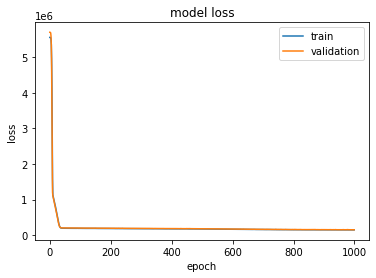

In [9]:
# Initialising the ANN
model = Sequential()
# Adding the input layer and the first hidden layer
model.add(Dense(units = 15, kernel_initializer = 'normal', activation = 'relu', input_dim = 8))
# Adding the second hidden layer
model.add(Dense(units = 12, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(units = 7, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
# classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.add(Dense(units = 1, kernel_initializer='normal'))
# Compiling the ANN
# classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# classifier.compile(optimizer = 'Adam', loss='mean_squared_error', metrics = ['accuracy'])
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
model.compile(optimizer='adam', loss='mean_squared_error')
# Fitting the ANN to the Training set
history = model.fit(X_train, y_train, batch_size = 100, epochs = 1000, verbose=0, validation_split=0.5)
# history = classifier.fit(X_train, y_train, batch_size = 50, epochs = 50, verbose=0, validation_split=0.2,)
# classifier.fit(X_train, y_train, batch_size = 50, epochs = 50, verbose=0, validation_split=0.2,)
# print(history)

plt.figure(0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['mean_squared_error'], loc='upper right')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

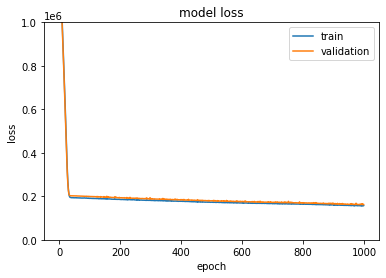

In [306]:
plt.figure(0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0,1000000)
# plt.legend(['mean_squared_error'], loc='upper right')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 15)                135       
_________________________________________________________________
dense_6 (Dense)              (None, 12)                192       
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 91        
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 24        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 4         
Total params: 446
Trainable params: 446
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = model.predict(X_test)
# y_pred = classifier.predict([[26.8,66.3]])
# print(X_test)
# print(y_pred[:,0])
# print(y_test[:])
error_average=0
for i in range(y_pred[:,0].size):
    error_average += (abs(y_pred[:,0][i]-y_test[:][i])/y_test[:][i])
error_average/=y_pred[:,0].size
print(error_average)
# y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)

0.16604089764935331


In [12]:
# weights = model.get_weights() # Getting params
# print(weights)
# model.set_weights(weights) # Setting params
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


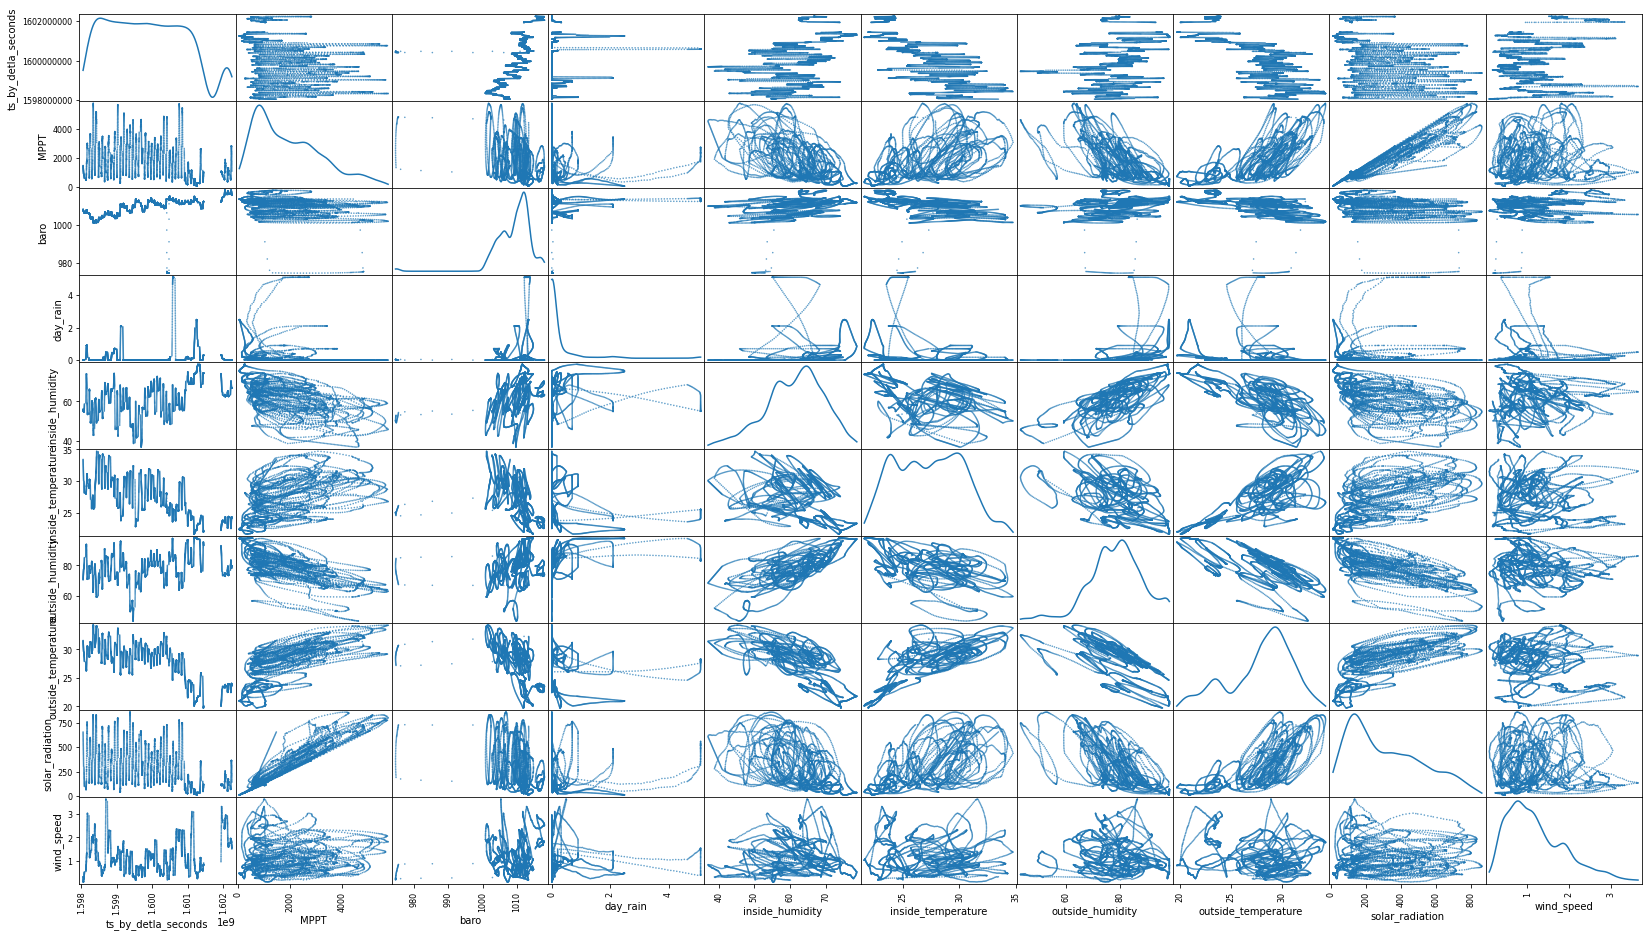

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
try:
    data = pd.read_csv("white_energy_house.csv")
except:
    print ("Dataset could not be loaded.")
pd.plotting.scatter_matrix(data, alpha=0.7, figsize=(28,16), diagonal='kde', s=10)
# plt.show()
plt.savefig('scatter_matrix.jpg')